In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
creditcard = pd.read_csv('./Data/default_data.csv')
creditcard.head()

,default,student,balance,income
0,No,No,509.778439,38614.41313
1,No,No,0.000000,34836.34070
2,No,No,1197.831505,54652.30930
3,No,No,0.000000,34305.91868
4,No,No,460.234439,47305.21604


In [6]:
creditcard.default = creditcard.default.map({'Yes' : 1, 'No' : 0})
creditcard.student = creditcard.student.map({'Yes' : 1, 'No' : 0})
creditcard.head()

,default,student,balance,income
0,0,0,509.778439,38614.41313
1,0,0,0.000000,34836.34070
2,0,0,1197.831505,54652.30930
3,0,0,0.000000,34305.91868
4,0,0,460.234439,47305.21604


In [8]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  833 non-null    int64  
 1   student  833 non-null    int64  
 2   balance  833 non-null    float64
 3   income   833 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 26.2 KB


In [9]:
creditcard.default.value_counts()

0    500
1    333
Name: default, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
creditcard_X_scaled = scaler.fit_transform(
    creditcard[['student', 'balance', 'income']]
    )
X_train, X_test, y_train, y_test = train_test_split(
    creditcard_X_scaled,
    creditcard.default,
    test_size=0.3, random_state=0
)

In [14]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.coef_

array([[-0.51905207,  3.48509736, -0.15247164]])

In [15]:
coeff = pd.Series(data=np.round(lr_clf.coef_[0], decimals=4), index=['student', 'balance', 'income'])
coeff

student   -0.5191
balance    3.4851
income    -0.1525
dtype: float64

In [16]:
y_pred = lr_clf.predict(X_test)
y_pred[:10]

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0])

In [17]:
y_pred_proba = lr_clf.predict_proba(X_test)
y_pred_proba[:10]

array([[6.01685117e-02, 9.39831488e-01],
       [2.81826297e-01, 7.18173703e-01],
       [4.55787286e-01, 5.44212714e-01],
       [9.93493552e-02, 9.00650645e-01],
       [9.12813332e-01, 8.71866684e-02],
       [3.07443168e-01, 6.92556832e-01],
       [9.93885230e-01, 6.11477017e-03],
       [9.97391685e-01, 2.60831453e-03],
       [9.99383729e-01, 6.16270695e-04],
       [8.50124879e-01, 1.49875121e-01]])

In [23]:
X_balance = X_train[:, [1]]

In [19]:
lr_clf.fit(X_balance, y_train)

LogisticRegression()

In [24]:
X_balance_new = np.linspace(-5, 5, 100).reshape(100, 1)
y_proba = lr_clf.predict_proba(X_balance_new)

In [32]:
y_proba[:, 1].shape, X_balance_new.shape

((100,), (100, 1))

Text(0.5, 0, 'balance')

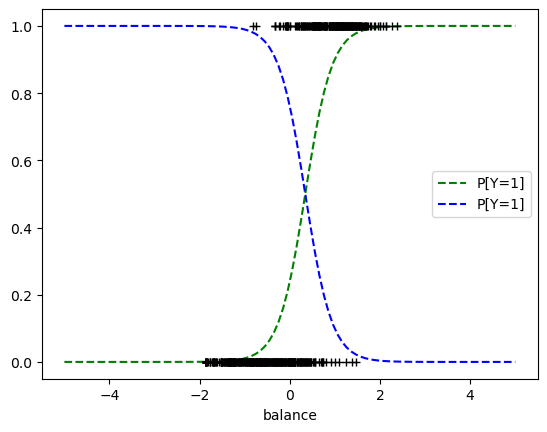

In [31]:
plt.plot(X_balance_new, y_proba[:, 1], 'g--', label='P[Y=1]')
plt.plot(X_balance_new, y_proba[:, 0], 'b--', label='P[Y=1]')
plt.legend()
plt.plot(X_balance, y_train, 'k+')
plt.xlabel('balance')